In [ ]:

import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


In [ ]:
!pip install -q 'git+https://github.com/facebookresearch/segment-anything.git'

  Preparing metadata (setup.py) ... done


In [ ]:
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This be

In [ ]:


!mkdir -p {HOME}/weights
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -P {HOME}/weights

In [ ]:

import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


In [ ]:

!mkdir -p {HOME}/data

In [ ]:

import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [ ]:

from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)


In [ ]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [ ]:

import os

IMAGE_NAME = "img_1.jpg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

In [ ]:

import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

In [ ]:

print(sam_result[0].keys())

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


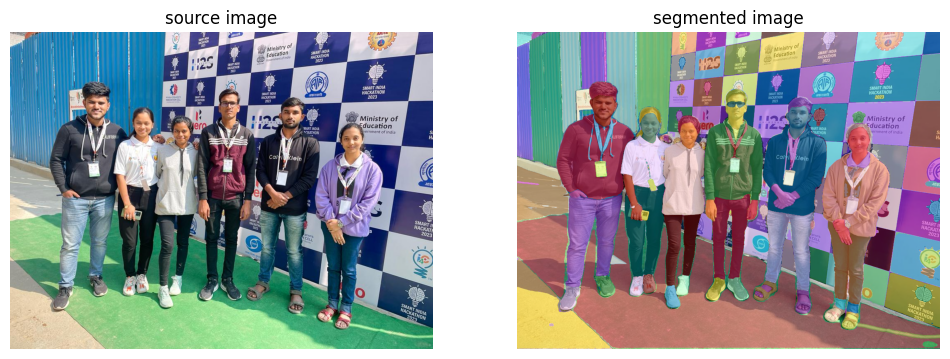

In [ ]:
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

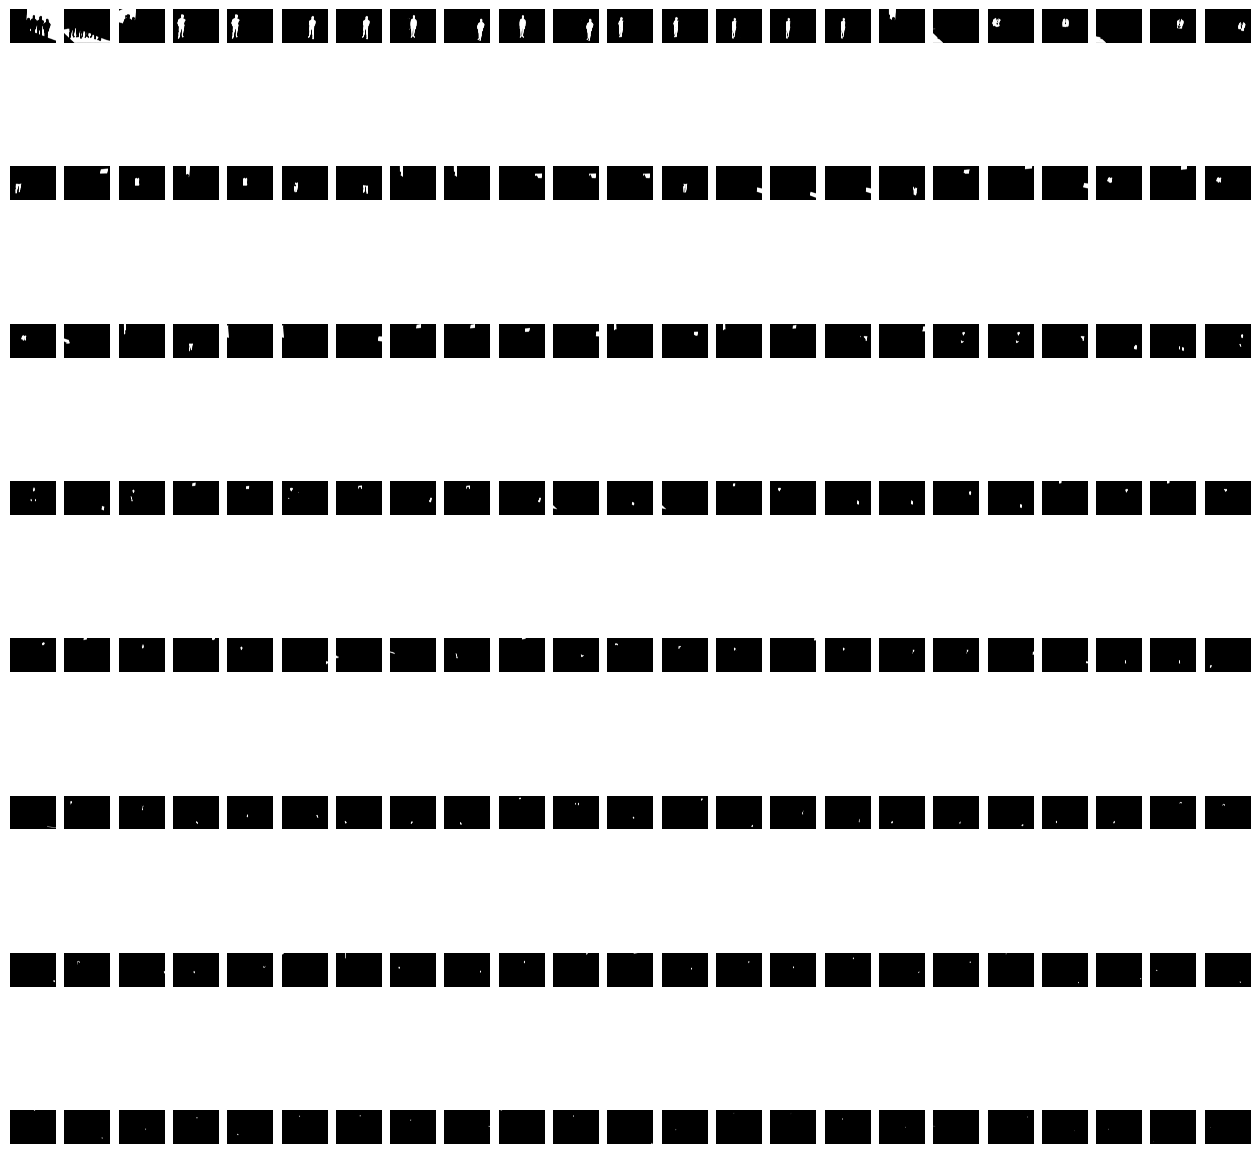

In [ ]:
masks = [
    mask['segmentation']
    for mask
    in sorted(sam_result, key=lambda x: x['area'], reverse=True)
]

sv.plot_images_grid(
    images=masks,
    grid_size=(8, int(len(masks) / 8)),
    size=(16, 16)
)


In [ ]:
mask_predictor = SamPredictor(sam)


In [ ]:

import os

IMAGE_NAME = "img_1.jpg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)


In [ ]:

import base64

def encode_image(filepath):
    with open(filepath, 'rb') as f:
        image_bytes = f.read()
    encoded = str(base64.b64encode(image_bytes), 'utf-8')
    return "data:image/jpg;base64,"+encoded

In [ ]:
IS_COLAB = True

if IS_COLAB:
    from google.colab import output
    output.enable_custom_widget_manager()

from jupyter_bbox_widget import BBoxWidget

widget = BBoxWidget()
widget.image = encode_image(IMAGE_PATH)
widget

BBoxWidget(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#b…

In [ ]:

widget.bboxes

[{'x': 458, 'y': 138, 'width': 123, 'height': 508, 'label': ''},
 {'x': 630, 'y': 157, 'width': 92, 'height': 483, 'label': ''},
 {'x': 778, 'y': 221, 'width': 103, 'height': 455, 'label': ''},
 {'x': 370, 'y': 189, 'width': 80, 'height': 496, 'label': ''},
 {'x': 267, 'y': 182, 'width': 78, 'height': 478, 'label': ''},
 {'x': 129, 'y': 98, 'width': 123, 'height': 579, 'label': ''}]

In [ ]:
import numpy as np

# List of boxes, each with coordinates and a label
boxes = [
    {'x': 458, 'y': 138, 'width': 123, 'height': 508, 'label': 'pandurang'},
    {'x': 630, 'y': 157, 'width': 92, 'height': 483, 'label': 'prajwal'},
    {'x': 778, 'y': 221, 'width': 103, 'height': 455, 'label': 'amurata'},
    {'x': 370, 'y': 189, 'width': 80, 'height': 496, 'label': 'shaheesta'},
    {'x': 267, 'y': 182, 'width': 78, 'height': 478, 'label': 'hemangi'},
    {'x': 129, 'y': 98, 'width': 123, 'height': 579, 'label': 'masih'}
]

# Initialize an empty list to store the reformatted boxes and labels
formatted_boxes = []

# Iterate over each box to reformat it and extract the label
for box in boxes:
    formatted_box = np.array([
        box['x'],
        box['y'],
        box['x'] + box['width'],
        box['y'] + box['height'],
        box['label']  # Assuming label is a string like 'class1', 'class2', etc.
    ])
    formatted_boxes.append(formatted_box)
box=np.array(formatted_boxes)
box
# formatted_boxes now contains all boxes and their labels


array([['458', '138', '581', '646', 'pandurang'],
       ['630', '157', '722', '640', 'prajwal'],
       ['778', '221', '881', '676', 'amurata'],
       ['370', '189', '450', '685', 'shaheesta'],
       ['267', '182', '345', '660', 'hemangi'],
       ['129', '98', '252', '677', 'masih']], dtype='<U21')

In [ ]:
import cv2
import numpy as np
import supervision as sv

# Assuming IMAGE_PATH is defined and points to your image
# IMAGE_PATH = 'path_to_your_image.jpg

# Load and convert the image
image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Set the image for the mask predictor
mask_predictor.set_image(image_rgb)

# Iterate over each box and predict the mask
all_masks = []
all_scores = []
all_logits = []

for box in formatted_boxes:  # Assuming formatted_boxes is a list of boxes
    masks, scores, logits = mask_predictor.predict(
        box=box[:4],  # [x_min, y_min, x_max, y_max] part of the box
        multimask_output=True
    )
    all_masks.append(masks)
    all_scores.append(scores)
    all_logits.append(logits)

# all_masks, all_scores, and all_logits now contain the results for each box


In [ ]:
import supervision as sv
import numpy as np

# Assuming all_masks, all_scores, and all_logits are lists containing the results for each box
# Initialize the annotators
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red(), color_lookup=sv.ColorLookup.INDEX)

# Process each detection and annotate the images
annotated_images = []

for masks, scores, logits in zip(all_masks, all_scores, all_logits):
    detections = sv.Detections(
        xyxy=sv.mask_to_xyxy(masks=masks),
        mask=masks
    )
    # Filter detections if needed, here filtering to the one with the largest area
    detections = detections[detections.area == np.max(detections.area)]

    # Annotate the images for each detection
    source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections, skip_label=False)
    segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

    # Add the annotated images to the list
    annotated_images.append((source_image, segmented_image))

# Plot the images for each detection
for i, (source, segmented) in enumerate(annotated_images):
    sv.plot_images_grid(
        images=[source, segmented],
        grid_size=(1, 2),
        titles=[f'source image {i+1}', f'segmented image {i+1}']
    )


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import cv2
import supervision as sv
import numpy as np

# Initialize the annotators
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red(), color_lookup=sv.ColorLookup.INDEX)

# Function to draw labels on an image
def draw_labels(image, boxes, labels, font=cv2.FONT_HERSHEY_SIMPLEX, font_scale=1, font_color=(0, 0, 0)):
    for box, label in zip(boxes, labels):
        # Coordinates for the label
        text_x, text_y = int(box[0]), int(box[1])
        # Put the text label on the image
        cv2.putText(image, label, (text_x, text_y), font, font_scale, font_color, 2)

# Process each detection and annotate the images
annotated_images = []

for masks, box in zip(all_masks, formatted_boxes):
    label = box[-1] if len(box) > 4 else "Class"

    detections = sv.Detections(
        xyxy=sv.mask_to_xyxy(masks=masks),
        mask=masks
    )

    # Filter detections if needed
    detections = detections[detections.area == np.max(detections.area)]

    # Annotate the images with boxes and masks
    source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections, skip_label=True)
    segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

    # Draw labels on the images
    draw_labels(source_image, [box[:4]], [label])
    draw_labels(segmented_image, [box[:4]], [label])

    # Add the annotated images to the list
    annotated_images.append((source_image, segmented_image))

# Plot the images with labels
for i, (source, segmented) in enumerate(annotated_images):
    sv.plot_images_grid(
        images=[source, segmented],
        grid_size=(1, 2),
        titles=[f'source image {i+1}', f'segmented image {i+1}']
    )


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import os
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Ensure the target directory exists
os.makedirs('/content/data', exist_ok=True)

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    file_path = os.path.join('/content/data', filename)
    with open(file_path, 'wb') as f:
        f.write(binary)
    return file_path

# Take a photo and specify the filename
filename = take_photo('my_image.jpg')

print(f"Saved to {filename}")
# Now you can use the image at the saved path for your tasks


<IPython.core.display.Javascript object>

Saved to /content/data/my_image.jpg


In [ ]:
import os
import cv2
import torch
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Assuming you have a model named 'sam_model'
# Train or load your model here

# Save your model
model_path = '/content/data/sam_model.pth'
torch.save(sam.state_dict(), model_path)

# ... Later or in a different session ...

# Load your model
sam.load_state_dict(torch.load(model_path))
sam.eval()


Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [ ]:
import os
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the home directory and checkpoint path
HOME = '/content/drive/My Drive'  # This should be the path to the directory in Google Drive where you store your checkpoints
# CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
import os
import cv2
import torch
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Assuming you have a model named 'sam_model'
# Train or load your model here

# Save your model
model_path = '/content/drive/My Drive/Dataset/sam_model.pth'
torch.save(sam.state_dict(), model_path)

# ... Later or in a different session ...

# Load your model
sam.load_state_dict(torch.load(model_path))
sam.eval()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d